<a href="https://colab.research.google.com/github/EfandraEka/CAPSTONE-PROJECT_Minggu1/blob/main/CAPSTONE_PROJECT_Minggu1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)  # Agar semua kolom ditampilkan

Penjelasan:
Mengimpor pustaka yang dibutuhkan untuk analisis data (pandas, numpy),
visualisasi (seaborn, matplotlib), preprocessing (LabelEncoder, StandardScaler), dan penanganan ketidakseimbangan data (SMOTE).

In [6]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/ObesityDataSet.csv')  # Ubah sesuai path file Anda

Penjelasan:
Membaca file CSV dan menyimpannya ke dalam DataFrame df.

In [7]:
print(df.head())                # Menampilkan 5 baris pertama
print(df.info())                # Menampilkan tipe data dan jumlah data non-null
print(df.describe())            # Statistik deskriptif fitur numerik
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

Penjelasan:
Memberi gambaran awal isi dataset, seperti jumlah data, tipe fitur, dan statistiknya.

In [8]:
print("Missing values:\n", df.isnull().sum())
print("Jumlah data duplikat:", df.duplicated().sum())

for col in df.columns:
    print(f"{col} -> {df[col].nunique()} nilai unik")

Missing values:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Jumlah data duplikat: 18
Age -> 1394 nilai unik
Gender -> 3 nilai unik
Height -> 1562 nilai unik
Weight -> 1518 nilai unik
CALC -> 5 nilai unik
FAVC -> 3 nilai unik
FCVC -> 808 nilai unik
NCP -> 637 nilai unik
SCC -> 3 nilai unik
SMOKE -> 3 nilai unik
CH2O -> 1263 nilai unik
family_history_with_overweight -> 3 nilai unik
FAF -> 1186 nilai 

Penjelasan:

- Mengecek apakah ada data kosong (missing values) dan data yang sama persis (duplikat).
- Menampilkan jumlah nilai unik pada setiap kolom, berguna untuk mengenali fitur kategorikal.

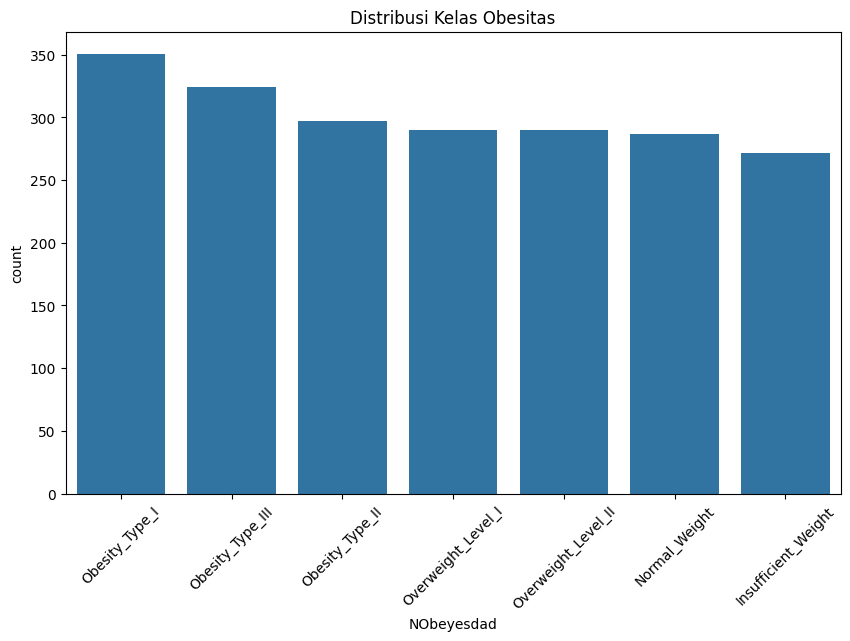

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Obesitas')
plt.xticks(rotation=45)
plt.show()

Penjelasan:
Menampilkan jumlah data per kategori obesitas. Ini penting untuk melihat apakah data target seimbang atau tidak.

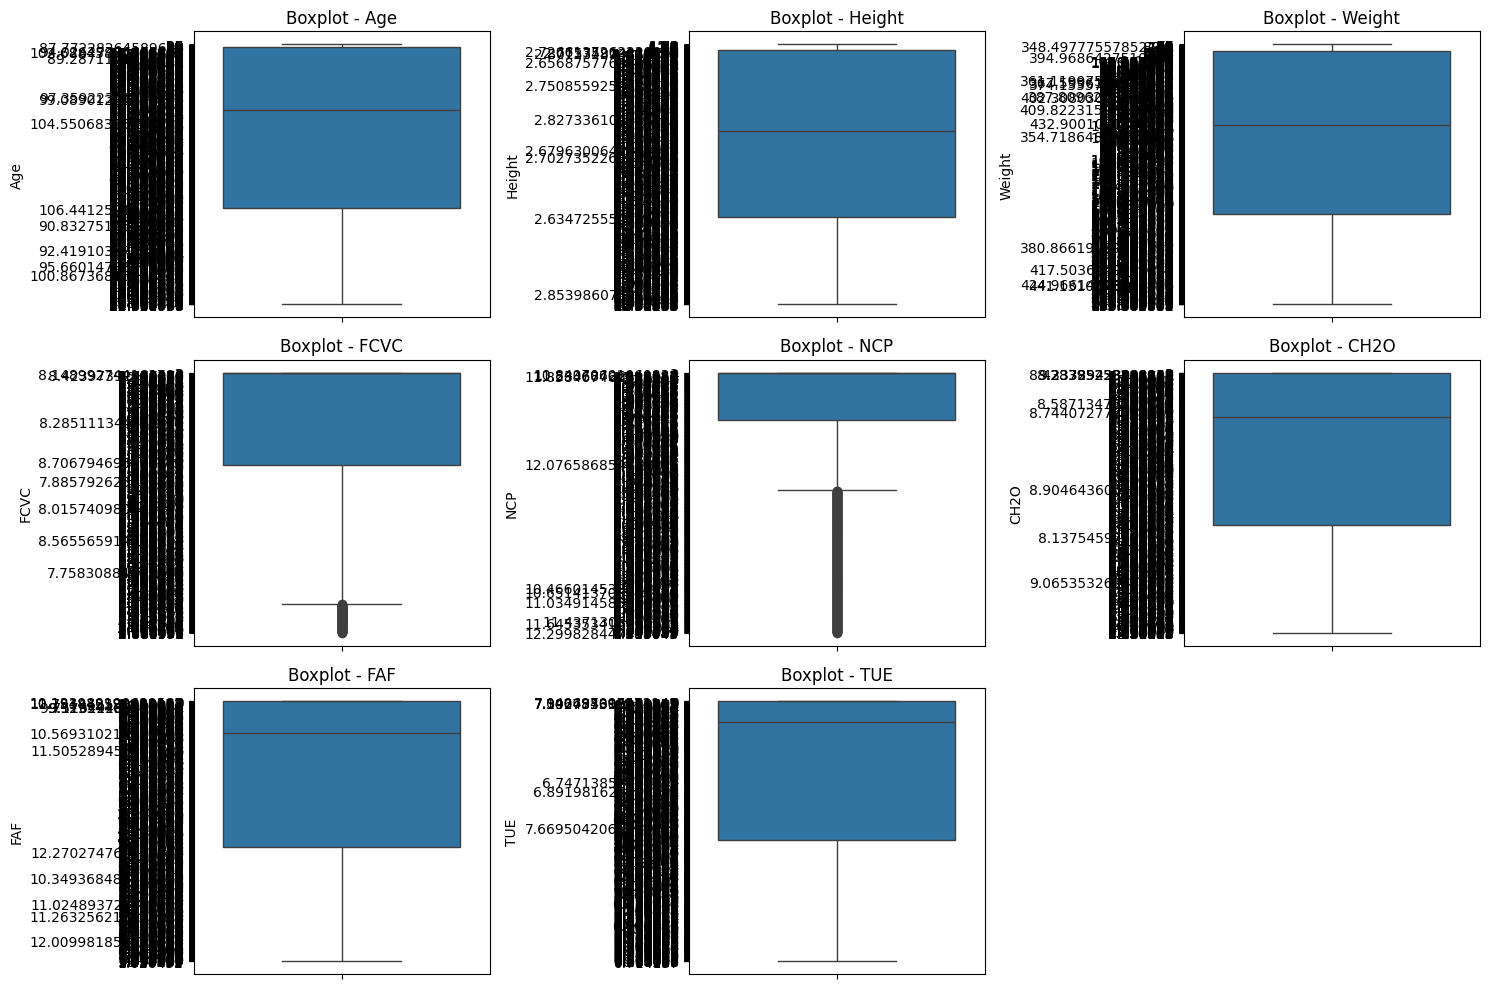

In [10]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

Penjelasan:
Boxplot membantu mendeteksi outlier (nilai ekstrem) pada fitur numerik.

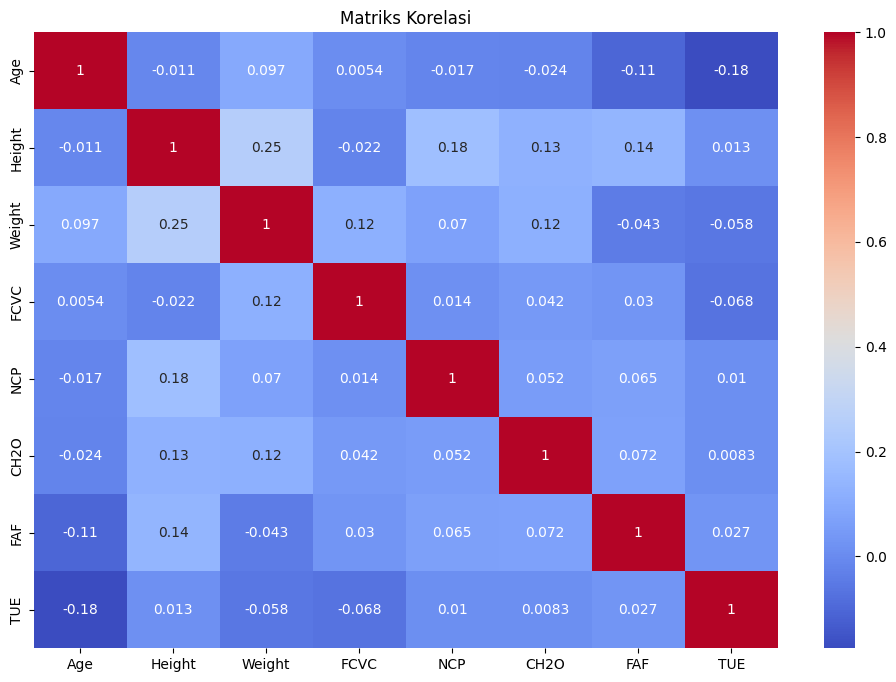

In [12]:
# Replace '?' with NaN and then convert columns to numeric
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].replace('?', np.nan))

plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Penjelasan:
Menampilkan hubungan (korelasi) antar fitur numerik, membantu saat seleksi fitur.

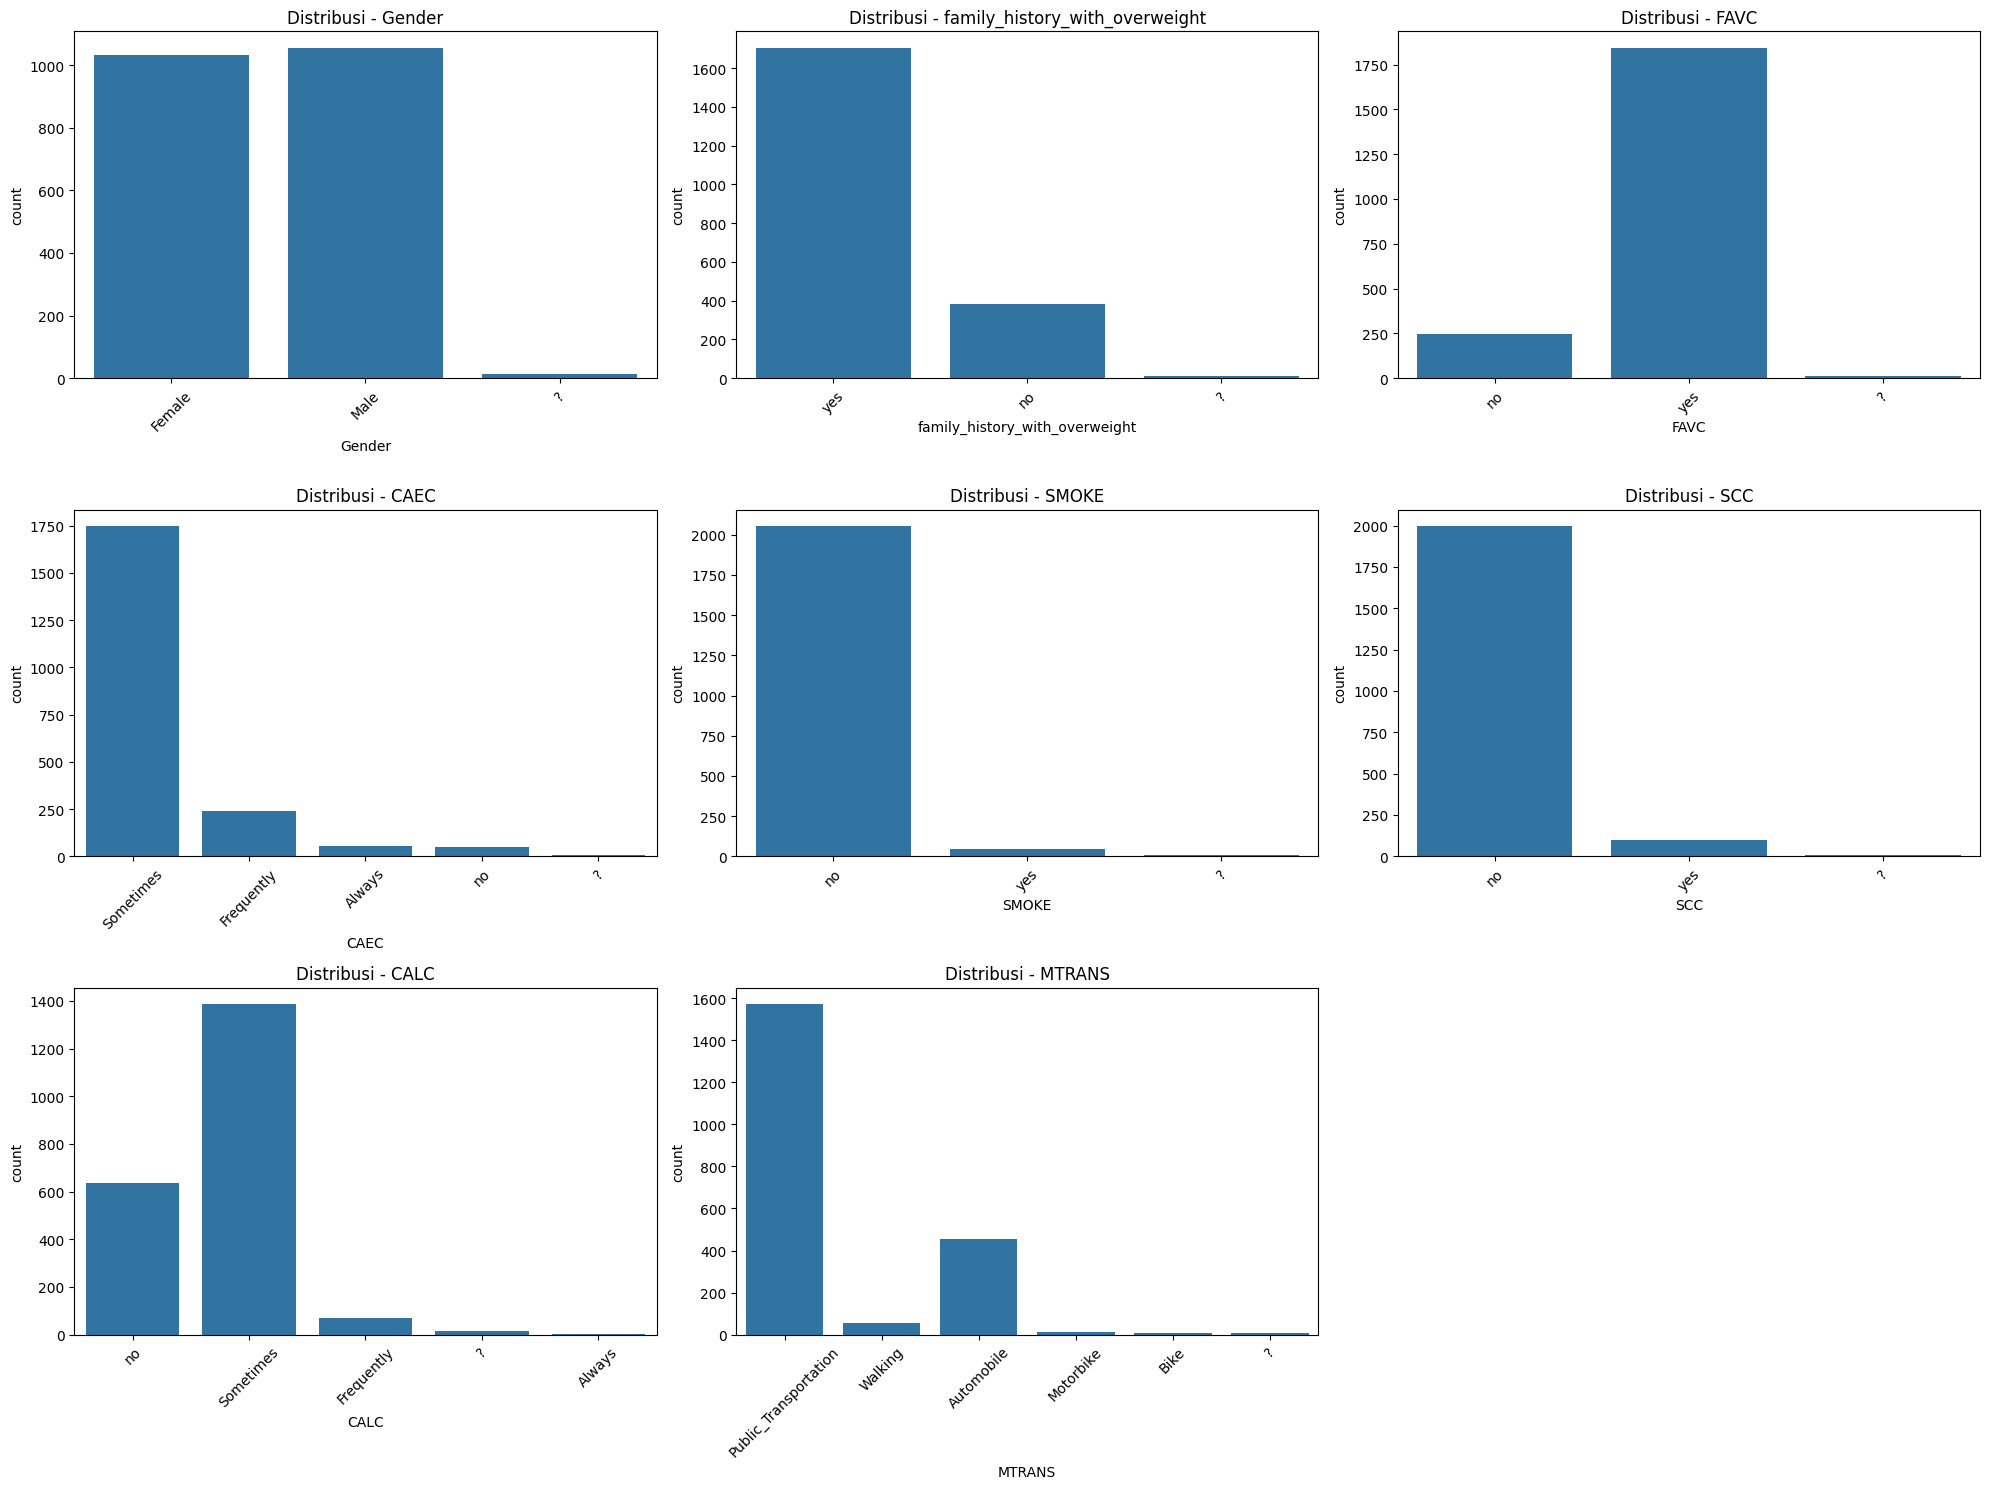

In [13]:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

plt.figure(figsize=(20,15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi - {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penjelasan:
Menampilkan distribusi setiap fitur kategorikal untuk analisis lebih lanjut.

In [14]:
df.drop_duplicates(inplace=True)

Penjelasan:
Menghapus baris yang identik untuk menjaga keunikan data.

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in numerical_cols:
    df = remove_outliers(df, col)

Penjelasan:
Menghapus outlier menggunakan metode IQR (Interquartile Range), agar model tidak bias karena nilai ekstrem.

In [16]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Penjelasan:
Mengubah data kategorikal menjadi angka agar bisa digunakan oleh algoritma machine learning.

In [17]:
print("Korelasi fitur terhadap target:\n")
print(df.corr()['NObeyesdad'].abs().sort_values(ascending=False))

Korelasi fitur terhadap target:

NObeyesdad                        1.000000
Weight                            0.396927
family_history_with_overweight    0.321719
CAEC                              0.255344
Age                               0.253629
CALC                              0.176058
NCP                               0.166306
FAF                               0.144593
CH2O                              0.112574
SCC                               0.099103
FCVC                              0.097301
FAVC                              0.092094
TUE                               0.060531
SMOKE                             0.060095
Gender                            0.024651
Height                            0.003523
MTRANS                            0.002009
Name: NObeyesdad, dtype: float64


Penjelasan:
Membantu mengidentifikasi fitur yang paling relevan terhadap target.

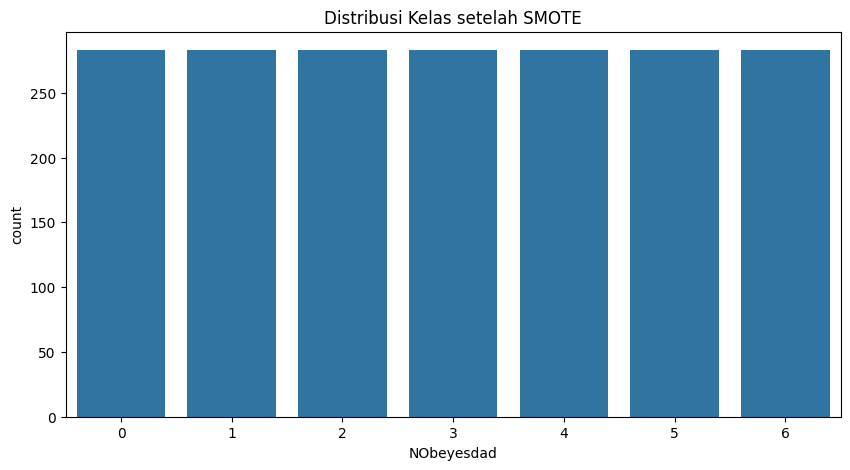

In [18]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(10,5))
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas setelah SMOTE")
plt.show()

Penjelasan:
SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menyeimbangkan jumlah data tiap kelas dengan membuat data sintetis untuk kelas minoritas.

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

Penjelasan:
Normalisasi dengan StandardScaler mengubah data numerik agar memiliki distribusi standar (mean=0, std=1). Sangat berguna untuk algoritma berbasis jarak seperti KNN, SVM.



In [20]:
print("""
KESIMPULAN TAHAP PREPROCESSING:

1. Duplikasi berhasil dihapus. Tidak ditemukan missing values.
2. Outlier dihapus menggunakan metode IQR pada fitur numerik.
3. Semua data kategorikal telah diubah ke bentuk numerik menggunakan LabelEncoder.
4. Ketidakseimbangan data berhasil ditangani dengan SMOTE.
5. Data telah dinormalisasi dengan StandardScaler untuk mendukung algoritma machine learning.
6. Dataset telah siap digunakan untuk pelatihan dan pengujian model klasifikasi obesitas.
""")


KESIMPULAN TAHAP PREPROCESSING:

1. Duplikasi berhasil dihapus. Tidak ditemukan missing values.
2. Outlier dihapus menggunakan metode IQR pada fitur numerik.
3. Semua data kategorikal telah diubah ke bentuk numerik menggunakan LabelEncoder.
4. Ketidakseimbangan data berhasil ditangani dengan SMOTE.
5. Data telah dinormalisasi dengan StandardScaler untuk mendukung algoritma machine learning.
6. Dataset telah siap digunakan untuk pelatihan dan pengujian model klasifikasi obesitas.

